<a href="https://colab.research.google.com/github/ImMikeC/JavaCat2/blob/master/Trabajo_Practico_2_Big_Data_JOSE_MIGUEL_CEBALLOS_CORREA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico n° 2 Especialidad IV ACI 806 Big Data                   
---
#### Profesor: Juan Antonio Pinto Paves
#### Alumno: José Miguel Ceballos Correa




DESARROLLO DE LA ACTIVIDAD:
**"Construcciones más altas del mundo"**


---



1.   Primero que todo, debemos disponibilizar el archivo en la plataforma Google Colab:

In [5]:
from google.colab import files
uploaded = files.upload()


Saving tallest_buildings_global.csv to tallest_buildings_global.csv


2. Luego procedemos a importar Pandas para poder manipular la data importada y trabajarla en formato dataframe:

In [6]:
import pandas as pd
df = pd.read_csv('tallest_buildings_global.csv')


3. Ahora, podemos comenzar a explorar un poco los datos.
   Contamos con la siguiente información:


*   Ranking
*   Nombre de la construcción
*   Altura en metros
*   Altura en pies
*   Año de construcción
*   Número de pisos
*   Número de subterráneos
*   Ciudad
*   País



In [7]:
df.head()

,rank,name,height_m,height_ft,year_built,floors_above,floors_below_ground,city,country
0,1,Burj Khalifa,828.0,2717,2010,163,1.0,Dubai,United Arab Emirates
1,2,Merdeka 118,678.9,2227,2022,118,5.0,Kuala Lumpur,Malaysia
2,3,Shanghai Tower,632.0,2073,2015,128,5.0,Shanghai,China
3,4,Abraj Al-Bait Clock Tower,601.0,1972,2012,120,3.0,Mecca,Saudi Arabia
4,5,Ping An International Finance Centre,599.1,1966,2017,115,5.0,Shenzhen,China


4. La función **describe()** de Pandas nos entrega un resumen estadístico básico, con datos tales como la media, la desviación estándar, mínimos y máximos, 1er, 2° y 3er cuartiles.


In [8]:
df.describe()

,rank,height_m,height_ft,year_built,floors_above,floors_below_ground
count,78.000000,78.000000,78.000000,78.000000,78.000000,67.000000
mean,39.500000,427.306410,1401.923077,2012.384615,87.705128,4.000000
std,22.660538,84.193166,276.241038,12.808511,17.793264,1.381699
min,1.000000,350.000000,1148.000000,1931.000000,54.000000,1.000000
25%,20.250000,370.050000,1214.250000,2010.250000,75.500000,3.000000
50%,39.500000,401.850000,1318.500000,2016.500000,86.500000,4.000000
75%,58.750000,451.425000,1481.250000,2019.000000,97.750000,5.000000
max,78.000000,828.000000,2717.000000,2022.000000,163.000000,8.000000


Exploremos los valores nulos con la función **isna**:

In [9]:
df.isna

<bound method DataFrame.isna of     rank  ...               country
0      1  ...  United Arab Emirates
1      2  ...              Malaysia
2      3  ...                 China
3      4  ...          Saudi Arabia
4      5  ...                 China
..   ...  ...                   ...
73    74  ...                Russia
74    75  ...  United Arab Emirates
75    76  ...                 China
76    77  ...                 China
77    78  ...                 China

[78 rows x 9 columns]>

6. La función **df.isna()** es incompleta e insuficiente por sí misma. Por ello, es más conveniente conocer exactamente la variable y cuántos valores nulos tenemos.Para ello agregamos **sum()**:

In [10]:
df.isna().sum()

rank                    0
name                    0
height_m                0
height_ft               0
year_built              0
floors_above            0
floors_below_ground    11
city                    0
country                 0
dtype: int64

7. A continuación, eliminamos los nulos de la variable "floors_below_ground" ya que no nos permitirá generar una buena matriz de correlación. Para esto usaremos el comando **dropna()**:

In [12]:
print(df.shape) #primary dataframe size
df2 = df.dropna() #dropping na's
print(df2.shape) # new dataframe without na's

(78, 9)
(67, 9)


8. Ahora, generemos la matriz de correlación básica:

In [13]:
df2.corr()

,rank,height_m,height_ft,year_built,floors_above,floors_below_ground
rank,1.000000,-0.841994,-0.841940,-0.042497,-0.685392,-0.235834
height_m,-0.841994,1.000000,0.999999,0.076822,0.828161,0.099653
height_ft,-0.841940,0.999999,1.000000,0.076718,0.828096,0.099559
year_built,-0.042497,0.076822,0.076718,1.000000,-0.072743,0.273091
floors_above,-0.685392,0.828161,0.828096,-0.072743,1.000000,0.060040
floors_below_ground,-0.235834,0.099653,0.099559,0.273091,0.060040,1.000000


9. Podemos, antes de generar otro mapa de correlación, realizar algunos filtros. Por ejemplo, construcciones con una altura mayor a 100 m y que sean de China:

In [20]:
df_filtered = df2.query('height_m > 100' and 'Confirmed > 1' and 'country == "China"')
df_filtered.head()

,rank,name,height_m,height_ft,year_built,floors_above,floors_below_ground,city,country
2,3,Shanghai Tower,632.0,2073,2015,128,5.0,Shanghai,China
4,5,Ping An International Finance Centre,599.1,1966,2017,115,5.0,Shenzhen,China
7,8,Guangzhou CTF Finance Centre,530.0,1739,2016,111,5.0,Guangzhou,China
8,9,Tianjin CTF Finance Centre,530.0,1739,2019,97,4.0,Tianjin,China
9,10,China Zun,527.7,1731,2018,109,8.0,Beijing,China


10. También podemos generar una visualización más estética y destinada a una presentación gracias a **matplotlib** y **seaborn**:

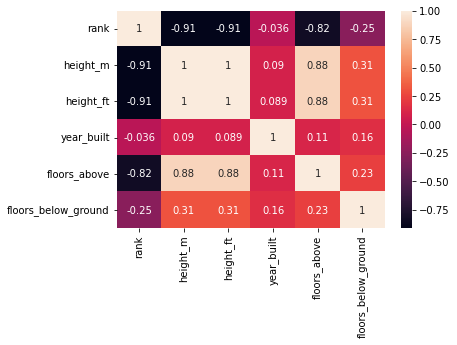

In [21]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df_filtered.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

11. Luego de haber filtrado los datos podemos seleccionar algunas columnas nuevamente y generar un histograma.

In [24]:
df_hist = df2[['year_built','country']]
df_hist.head()

,year_built,country
0,2010,United Arab Emirates
1,2022,Malaysia
2,2015,China
3,2012,Saudi Arabia
4,2017,China


12. Luego generamos el histograma:

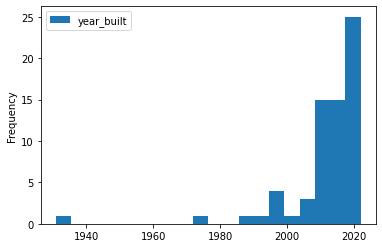

In [25]:
df_hist.plot.hist(bins=20)